In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable

# Подготовка и анализ данных

In [2]:
#load data
data = pd.read_csv("E:\GitHub\MasterWork\Data\S&P 500 Historical Data00-20.csv")

In [3]:
#transform data
data = data.replace(",", "", regex=True)
data.Date = pd.to_datetime(data.Date)
data = data.sort_values(by=["Date"])
data.set_index('Date')
data.Price = data.Price.astype(float)
data.High = data.High.astype(float)
data.Low = data.Low.astype(float)
data.Open = data.Open.astype(float)
data["Vol."] = data["Vol."].astype(float)
data.set_index('Date', inplace=True)

In [4]:
series = data.Price

In [5]:
# Разобъём наши данные таким образом
train = series[:int(0.7*(len(series)))]
valid = series[int(0.7*(len(series))):]

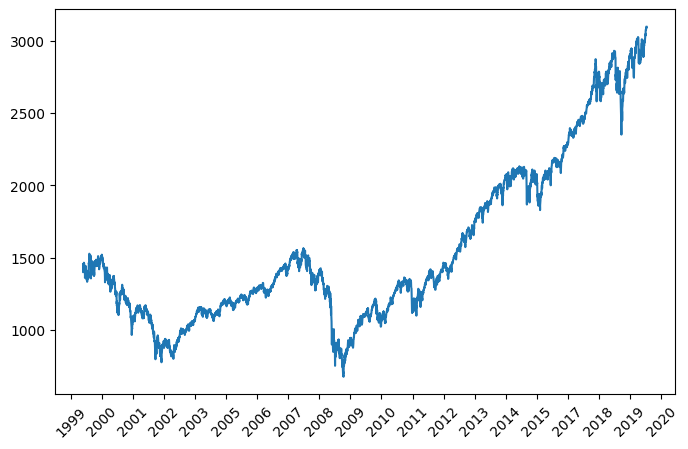

In [6]:
# Построим первоначальные данные
plt.figure(figsize = (8,5))
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xticks(rotation = 45)
plt.plot(series)
plt.show()

In [61]:
# Importing required modules
from pmdarima.arima import ADFTest

adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(series)


(0.8666041881106166, True)

In [62]:
#Importing the module
import pmdarima as pmd

arima_model = pmd.auto_arima(train, 
                              start_p=0,d = 1,start_q=0,
                              test="adf", supress_warnings = True,
                              trace=True)

#Summary of the model
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=28787.150, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=28767.174, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=28764.584, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=28785.310, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=28758.687, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=28760.116, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=28760.099, Time=0.47 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=28758.113, Time=0.23 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=28760.099, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=28761.141, Time=1.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=28756.337, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=28762.784, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=28758.321, Time=0.23 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=28758.322, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3500
Model:               SARIMAX(0, 1, 2)   Log Likelihood              -14375.168
Date:                Sat, 05 Nov 2022   AIC                          28756.337
Time:                        14:02:15   BIC                          28774.818
Sample:                             0   HQIC                         28762.933
                               - 3500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0838      0.012     -6.956      0.000      -0.107      -0.060
ma.L2         -0.0496      0.010     -5.168      0.000      -0.068      -0.031
sigma2       216.7733      2.927     74.053      0.000     211.036     222.511
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2951.20
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
#Predict the future values
valid['predicted'] = arima_model.predict(n_periods = len(valid))

def MAPE(true, pred): 
    true, pred = np.array(true), np.array(pred)
    return np.mean(np.abs((true - pred) / true)) * 100

MAPE(valid.IPG2211A2N, valid.predicted)

C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


AttributeError: 'Series' object has no attribute 'IPG2211A2N'

In [95]:
result = arima_model.predict(n_periods = len(valid))

C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [96]:
result

3500    1805.671365
3501    1805.721427
3502    1805.721427
3503    1805.721427
3504    1805.721427
           ...     
4995    1805.721427
4996    1805.721427
4997    1805.721427
4998    1805.721427
4999    1805.721427
Length: 1500, dtype: float64

In [94]:
valid[0]

1800.9

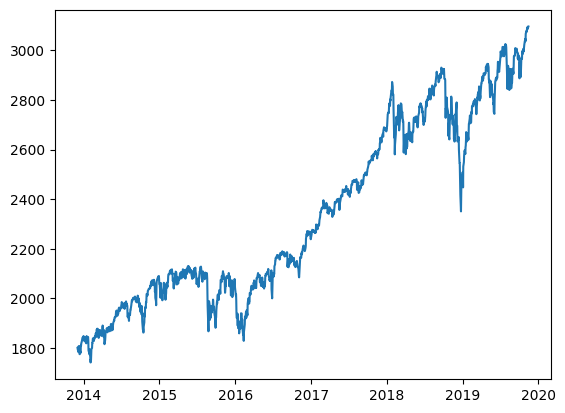

In [89]:
plt.plot(valid)
plt.show()